## 调用

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


excel = pd.read_excel("../B题数据.xlsx")
lon_lat = pd.read_excel('等高线图.xlsx')
x_label = excel['断面名称']  
y_labels = {  
    '高锰酸盐指数(mg/L)': 'purple',  
    '氨氮(mg/L)': 'red',  
    '总磷(mg/L)': 'green',  
    '总氮(mg/L)': 'orange'  
}  

plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

  

## 第一题

1、分析北京地区水系中高锰酸盐指数、氨氮、总磷、总氮的总体分布特征。  
*（分布特征分析）*

另外，为了绘图，我把广北滨河路（桥）的（桥）给去掉了，特此说明

### 数据分析

In [4]:
ana = excel[['高锰酸盐指数(mg/L)','氨氮(mg/L)','总磷(mg/L)','总氮(mg/L)']]
print(ana.describe())

       高锰酸盐指数(mg/L)   氨氮(mg/L)   总磷(mg/L)   总氮(mg/L)
count     19.000000  19.000000  19.000000  19.000000
mean       3.124211   0.118684   0.041053   5.606316
std        1.466304   0.247742   0.033975   3.291651
min        0.900000   0.025000   0.005000   1.190000
25%        2.145000   0.025000   0.005000   2.770000
50%        3.210000   0.026000   0.039000   5.490000
75%        4.215000   0.069500   0.059000   7.375000
max        5.830000   1.053000   0.108000  12.120000


### 箱线图

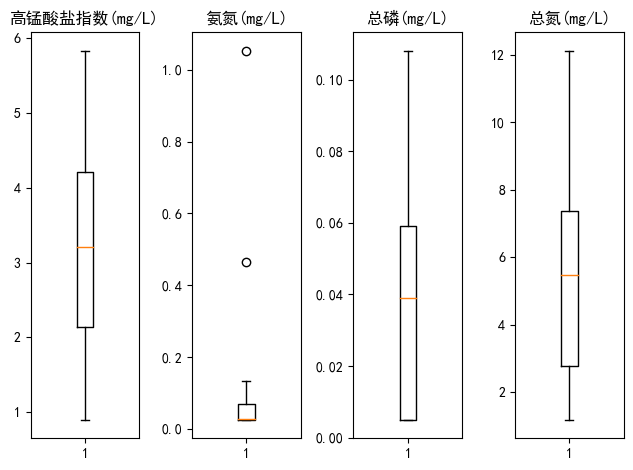

In [5]:
for i, anai in enumerate(ana):
    plt.subplot(1, 4, i+1)
    plt.boxplot(excel[anai])
    plt.title(anai)

plt.tight_layout()

plt.show()
    

#### 对氨氮组的特别分析，去除了两个异常值后


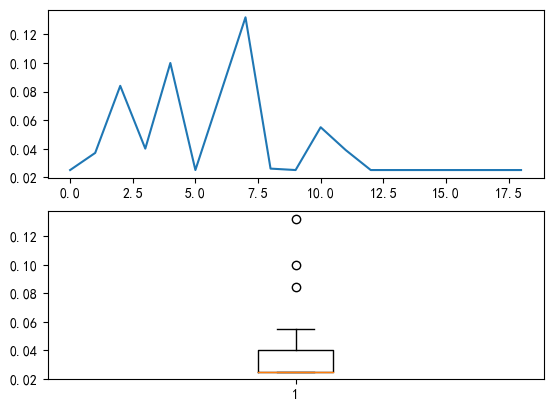

In [6]:
plt.subplot(2, 1, 1)
plt.plot(excel['氨氮(mg/L)'].drop([6,13]))
plt.subplot(2, 1, 2)
plt.boxplot(excel['氨氮(mg/L)'].drop([6,13]))

plt.show()

### 地区分布条形图

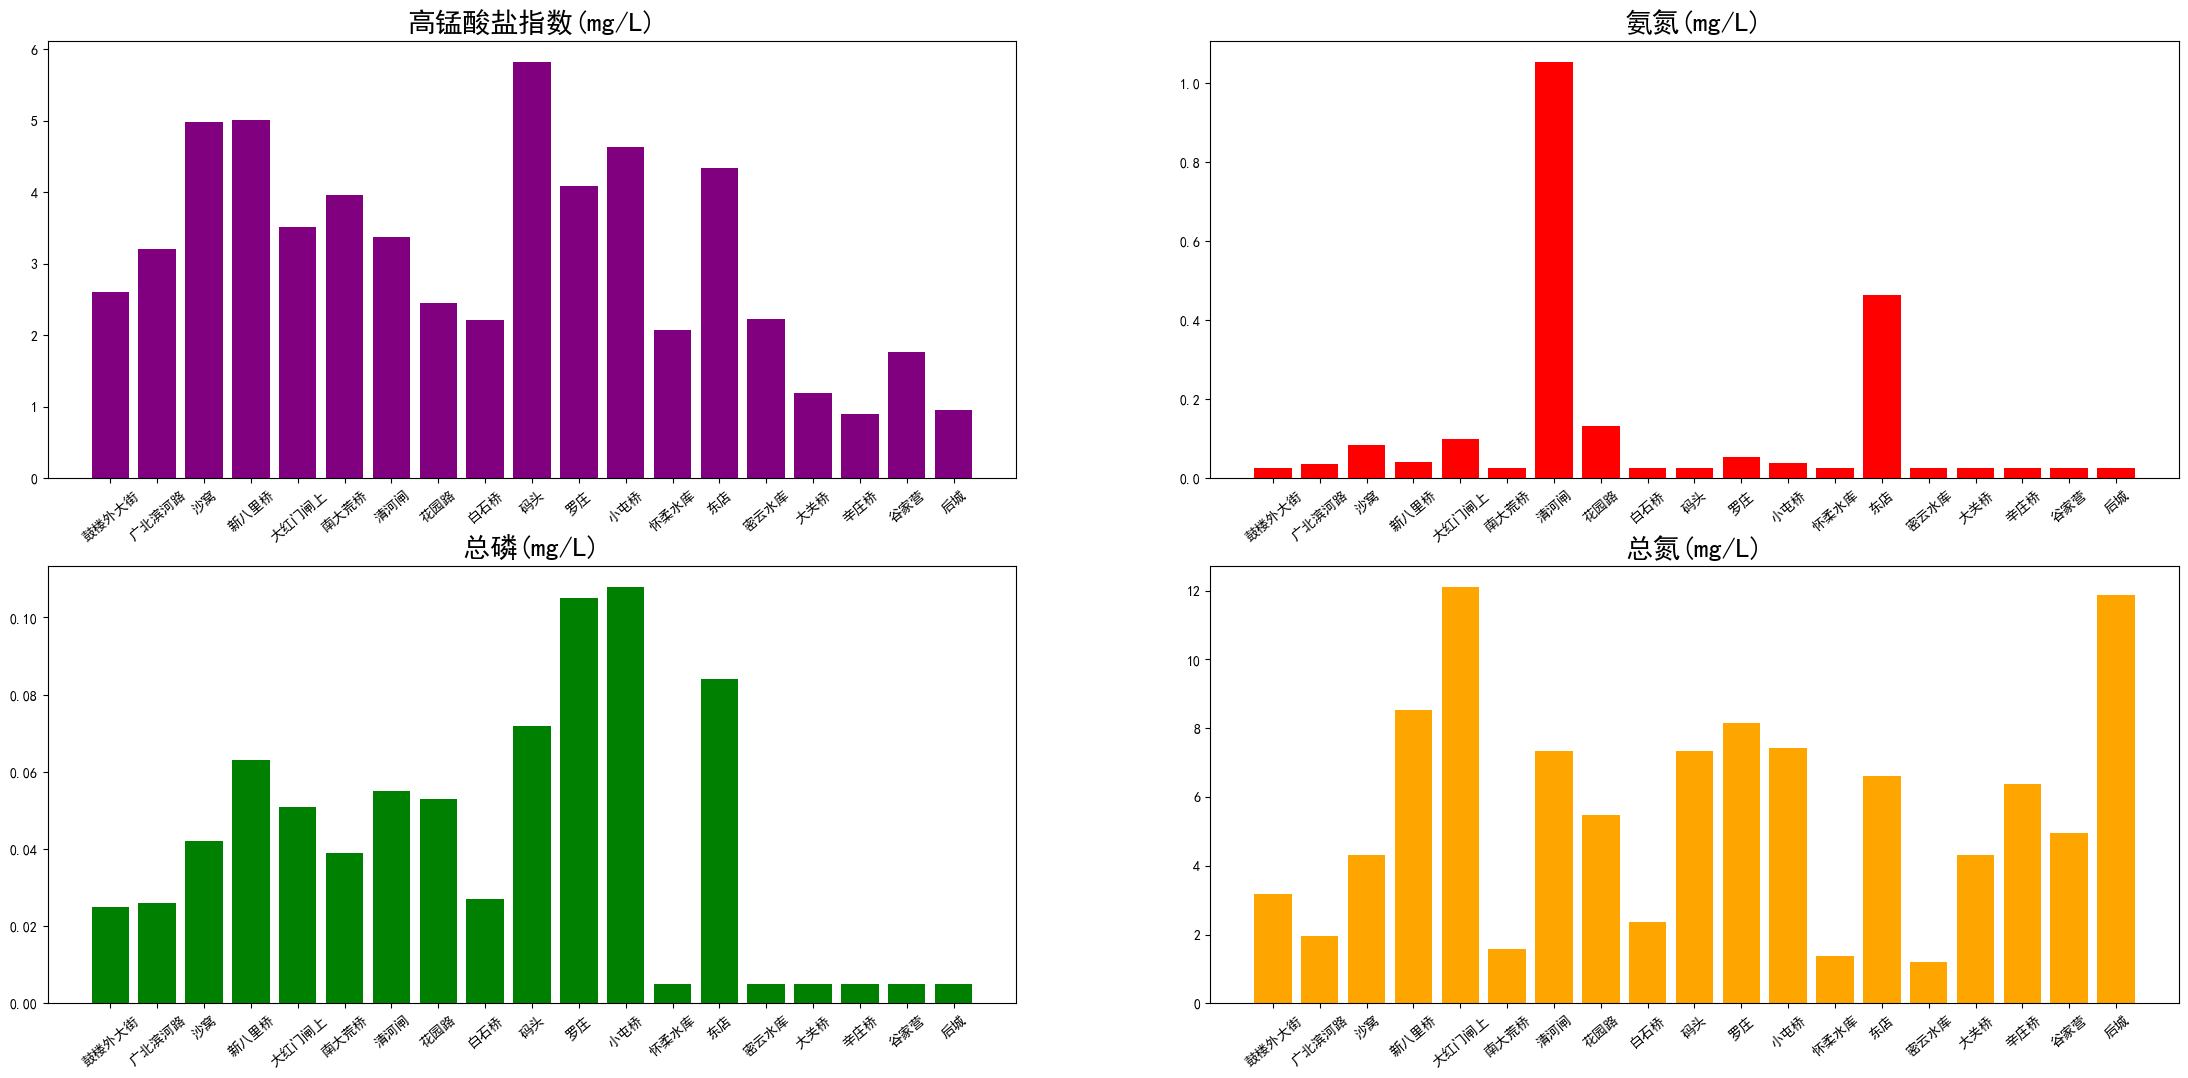

In [7]:
plt.figure(figsize=[27.50, 12.50])  

# 遍历y_labels字典，为每个指标创建子图  
for i, (ylabel, color) in enumerate(y_labels.items(), start=1):  
    plt.subplot(2, 2, i)  # 根据循环的索引选择子图位置  
    plt.bar(x_label, excel[ylabel], color=color, label=ylabel)  
    plt.xticks(rotation=40, fontsize=10) 
    plt.title(ylabel,fontsize=20)  
    plt.gca().xaxis.set_tick_params(labelrotation=40)
   
# 显示图例  
# plt.legend()  
  
# 显示图形  
plt.show()

### 等高线图

In [8]:
point_label = list(x_label)

Index(['Unnamed: 0', '经度', '纬度', '高锰酸盐指数(mg/L)', '氨氮(mg/L)', '总磷(mg/L)',
       '总氮(mg/L)'],
      dtype='object')


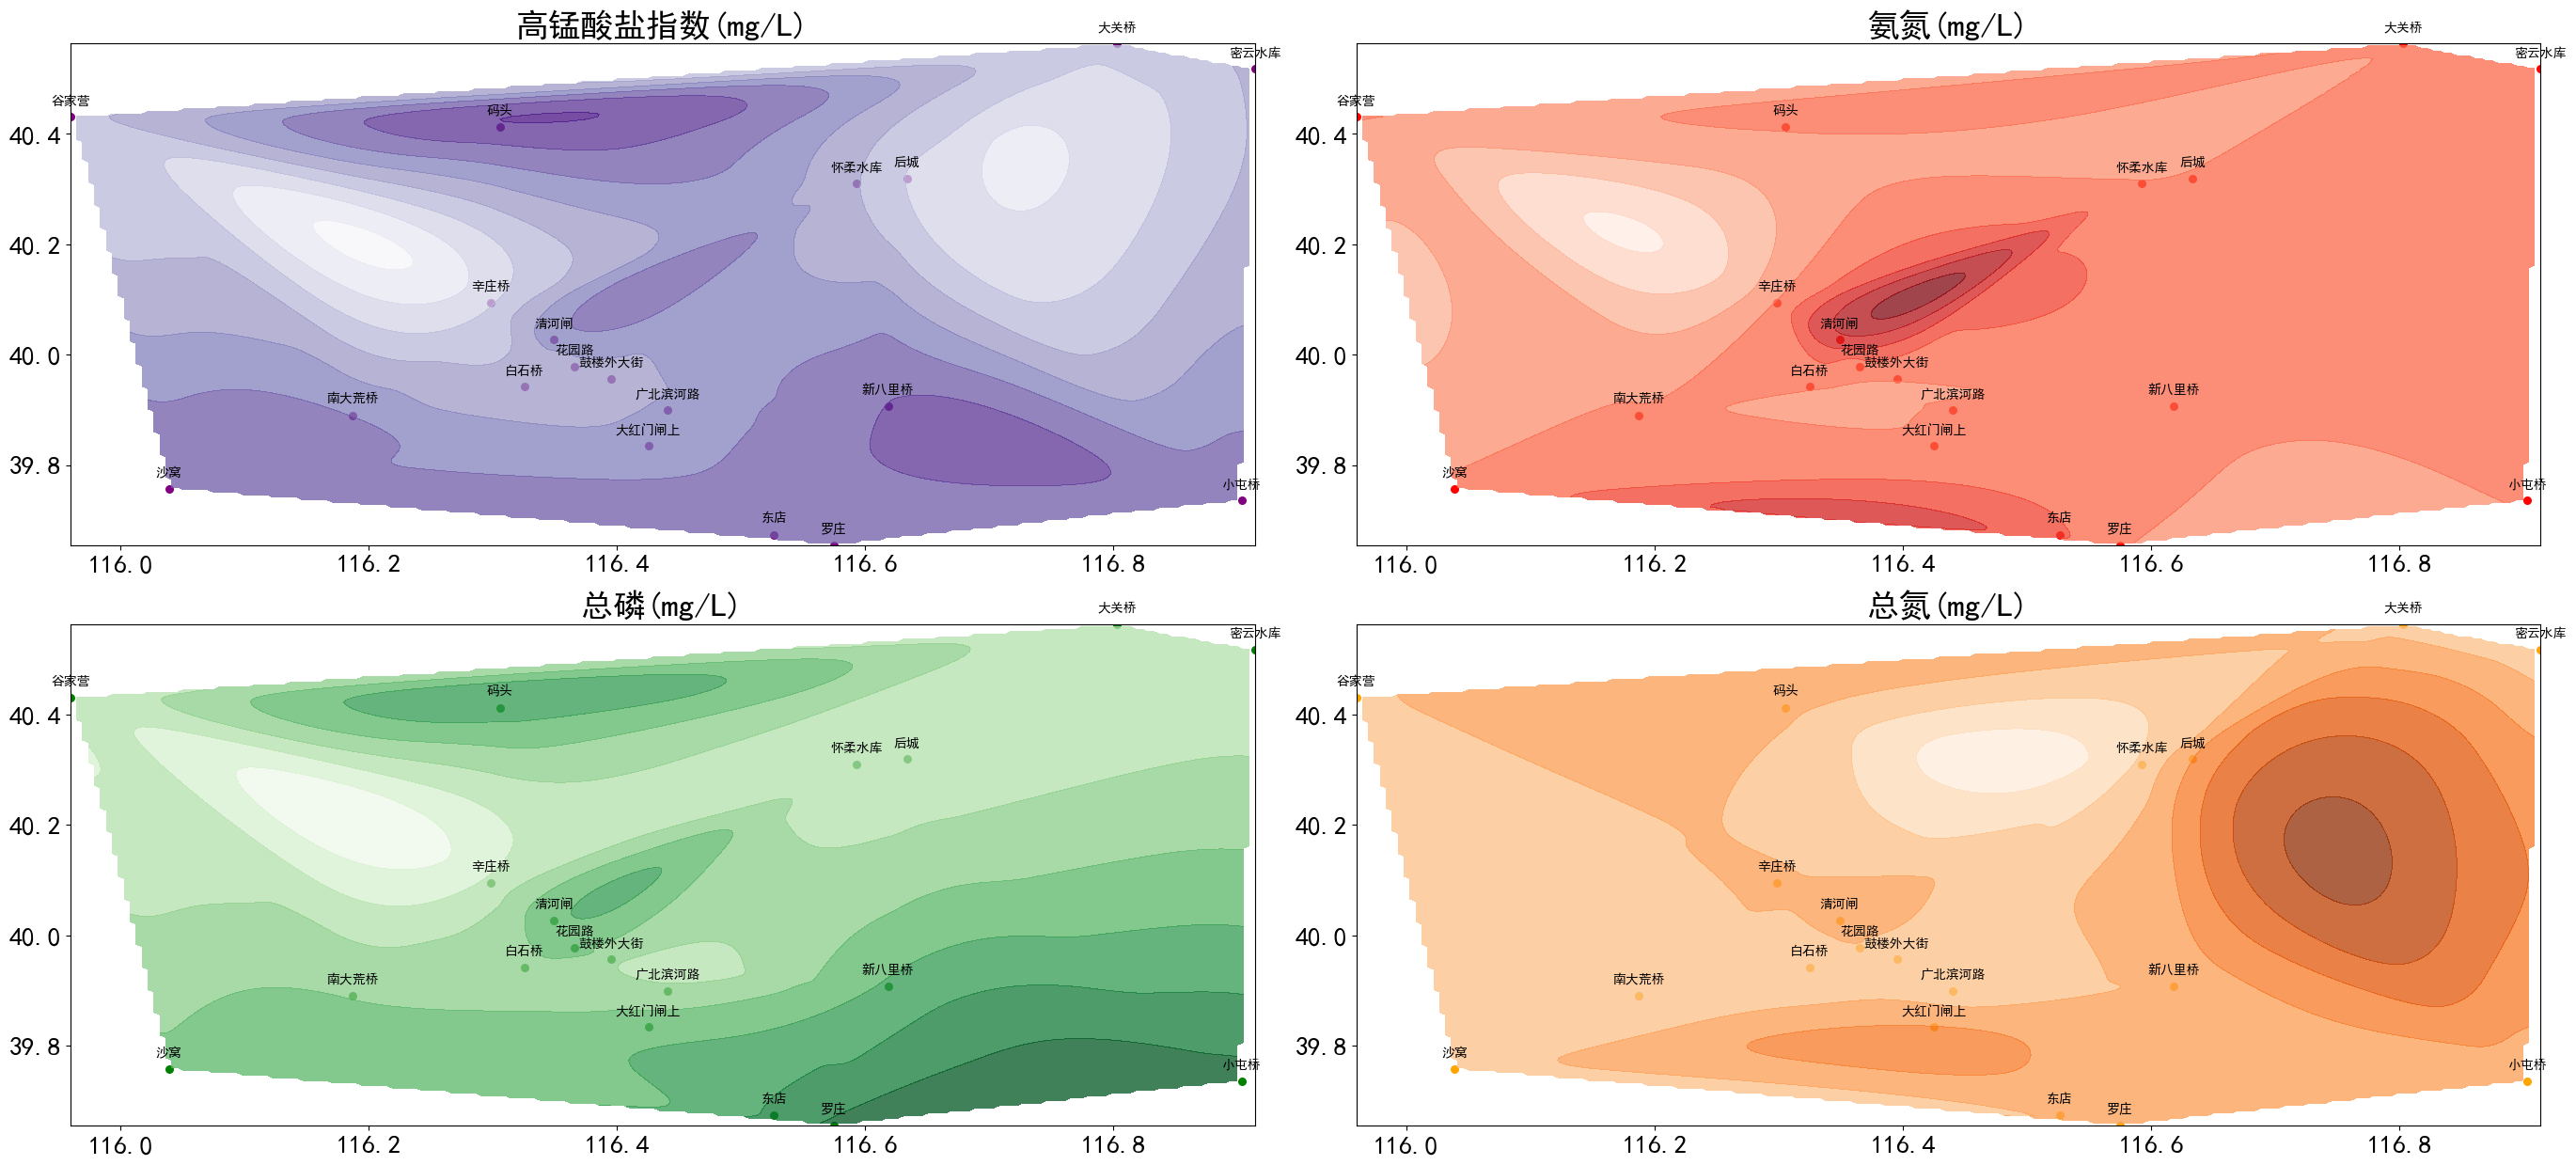

In [9]:
from scipy.interpolate import griddata
# print(lon_lat['经度'])
# 定义一维数组
x = lon_lat['经度']
y = lon_lat['纬度']
point=np.vstack([x,y]).T
# print(list(point))
print(lon_lat.columns)
xx,yy=np.meshgrid(np.linspace(x.min(),x.max(),200),np.linspace(y.min(),y.max(),200))

plt.figure(figsize=[27.50, 12.50])
for i, (ylabel, color) in enumerate(y_labels.items(), start=1): 
    index = lon_lat[ylabel]
    zz=griddata(points=point, values=index, xi=(xx,yy), method="cubic")
    plt.subplot(2, 2, i)
    plt.xticks(fontsize=20) 
    plt.yticks(fontsize=20)
    plt.title(ylabel,fontsize=25)  
    plt.scatter(x, y, c=color, s=30)
    plt.contourf(xx, yy, zz, alpha=0.75, cmap=f'{color.title()}s')
    for j, name in enumerate(x_label):
        plt.annotate(name, xy = list(point)[j], textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)
plt.tight_layout()
plt.show()